# Classificação de demência por RM

O objetivo é classificar pacientes com demência e não demência.

#### Metodologia

Este projeto foi dividido nas seguintes etapas:
+ Obtenção dos dados
+ Preparação/Normalização dos dados
+ Análises de outliers e correlação
+ Desenvolvimento do Modelo
 + Separação de grupos de treinamento e teste
+ Avaliação de classificadores
+ Validação e Otimização do Modelo
+ Resultados finais

## 1. Obtenção dos Dados
Obtendo os dados disponibilizados pelo projeto OASIS Brains (http://www.oasis-brains.org/). Dos dados apresentados possuem 373 amostras e 13 atributos, dos quais serão utilizados neste estudo 8 parâmetros.
<br> Também há o mesmo conjunto de dados disponível no (Kaggle) http://kaggle.com/ em (MRI and Alzheimers) https://www.kaggle.com/jboysen/mri-and-alzheimers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_data = pd.read_csv("data/oasis_longitudinal.csv")

In [3]:
df_data

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


A inspeção dos dados mostra que há dados ausentes, o que indica a necessidade de verificar como contornar para não desperdiçar os dados pois o universo de amostras não é tão grande.

#### Atributos

+ 1 - Subject ID: identificação do paciente
+ 2 - MRI ID: identificação do exame de RM
+ 3 - Visit: Número da visita de acompanhamento
+ 4 - MR Delay: delay do exame de RM (contraste)
+ 5 - M/F: sexo
+ 6 - Hand: mão dominante (destro ou canhoto)
+ 7 - EDUC: nível de educação
+ 8 - SES: nível sócio-econômico
+ 9 - MMSE: teste de cognição MMSE
+ 10 - CDR: teste de cognição CDR
+ 11 - eTIV: volume intracraniano estimado
+ 12 - nWBV: volume cerebral normalizado
+ 13 - ASF: fator de escala Atlas

#### Variável Alvo
+ 14 - Group: Classe, demência ou não demência

**Identifcar os Atributos elegíveis para classificação**

Dos atributos listados, os elegíveis para classificação são:
+ M/F
+ Hand
+ EDUC
+ SES
+ MMSE
+ DR
+ eTIV
+ nWBV
+ ASF

In [4]:
df_data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


## 2. Preparação dos dados (limpeza e imputação de dados)

### Verifica valores nulos nas tabelas

In [5]:
df_data.isnull().any()

Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay      False
M/F           False
Hand          False
Age           False
EDUC          False
SES            True
MMSE           True
CDR           False
eTIV          False
nWBV          False
ASF           False
dtype: bool

**Quantidade de valores nulos**

In [6]:
df_data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [7]:
df_data[df_data["SES"].isnull()]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,OAS2_0063,OAS2_0063_MR1,Demented,1,0,F,R,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,OAS2_0063,OAS2_0063_MR2,Demented,2,490,F,R,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,OAS2_0099,OAS2_0099_MR1,Demented,1,0,F,R,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,OAS2_0099,OAS2_0099_MR2,Demented,2,807,F,R,83,12,NaN,23.0,0.5,1484,0.750,1.183


In [8]:
df_data[df_data["MMSE"].isnull()]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
357,OAS2_0181,OAS2_0181_MR2,Demented,2,539,F,R,75,12,NaN,NaN,1.0,1169,0.742,1.501
358,OAS2_0181,OAS2_0181_MR3,Demented,3,1107,F,R,77,12,NaN,NaN,1.0,1159,0.733,1.515


Localizamos entradas nulas para o atributo **SES**. Como é um atributo de teste de congnição e importante ele será mantido e será impuado os valores ausentes com a média.

**Imputar valores:**

In [9]:
#utilizando replace
df_data["SES"] = df_data["SES"].replace(np.nan, df_data["SES"].mean())

In [10]:
df_data[df_data["SES"].isnull()]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF


In [11]:
#utilizando replace
df_data["MMSE"] = df_data["MMSE"].replace(np.nan, df_data["MMSE"].mean())

**Verificar valores nas colunas**

In [12]:
df_data[df_data["SES"].isnull()]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF


In [13]:
df_data[df_data["MMSE"].isnull()]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF


### Análise de valores com valores iguais a 0

In [14]:
(df_data == 0).any()

Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay       True
M/F           False
Hand          False
Age           False
EDUC          False
SES           False
MMSE          False
CDR            True
eTIV          False
nWBV          False
ASF           False
dtype: bool

In [15]:
#isin???
df_data.isin([0]).sum()

Subject ID      0
MRI ID          0
Group           0
Visit           0
MR Delay      150
M/F             0
Hand            0
Age             0
EDUC            0
SES             0
MMSE            0
CDR           206
eTIV            0
nWBV            0
ASF             0
dtype: int64

***Teste de CDR*** igual a 0 significa sujeito saudável, é um dado normal e esperado. O ***MR Delay*** igual a 0 é que não houve espera na tomada do exame, o que também é considerado normal. Diante disto, não serão transformados nenhum outro atributo além daqueles nulos previamente apresentados.

### Analise exploratória

Apresentar alguns gráficos para conhecer os dados

In [16]:
#função de geração dos gráficos
import matplotlib.ticker as ticker

def generate_charts(field):
    
    sns.set(font_scale = 1.5)
    
    #teste
    if field == "MR Delay":
        df_query_mri = df_data[df_data["MR Delay"] > 0]
        g = sns.countplot(df_query_mri["MR Delay"])
        g.figure.set_size_inches(18.5, 10.5)
    else:
    
        fig, ax = plt.subplots(1,2)

        df_chart_dem = df_data[df_data["Group"]=="Demented"]
        df_chart_ndem = df_data[df_data["Group"]=="Nondemented"]


        ax[0].set_title(str(item) + " Demented", fontsize=20)
        ax[1].set_title(str(item) + " Nondemented", fontsize=20)

        g1 = sns.countplot(x=item, data=df_chart_dem, ax=ax[0])
        g2 = sns.countplot(x=item, data=df_chart_ndem, ax=ax[1])

        g1.set_ylabel("Quantidade",fontsize=17)
        g2.set_ylabel("Quantidade",fontsize=17)

        g1.set_xlabel("Sujeitos", fontsize=17)
        g2.set_xlabel("Sujeitos", fontsize=17)

        #teste
        if item in ["Age", "eTIV", "nWBV", "ASF", "MMSE"]:

            if item in ["MMSE", "Age"]:
                g2.xaxis.set_major_locator(ticker.MultipleLocator(2))
                g1.xaxis.set_major_locator(ticker.MultipleLocator(2))
            else:
                g1.xaxis.set_major_formatter(ticker.ScalarFormatter())
                g2.xaxis.set_major_formatter(ticker.ScalarFormatter())
                g2.xaxis.set_major_locator(ticker.MultipleLocator(12))
                g1.xaxis.set_major_locator(ticker.MultipleLocator(12))

    
        g1.figure.set_size_inches(18.5, 10.5)
        g2.figure.set_size_inches(18.5, 10.5)

    #g = sns.countplot(x=df_chart_nondem[item], data=df_chart_dem)
    #g.set_title(item + "M/F - Demented",fontsize=20)
    #g.set_ylabel("Quantidade",fontsize=17)
    #g.figure.set_size_inches(10.5, 5.5)
    
sns.despine()

<Figure size 432x288 with 0 Axes>

In [17]:
list_atributes = ["M/F", "Age", "EDUC", "SES", "MMSE", "CDR", "eTIV", "nWBV", "ASF"]

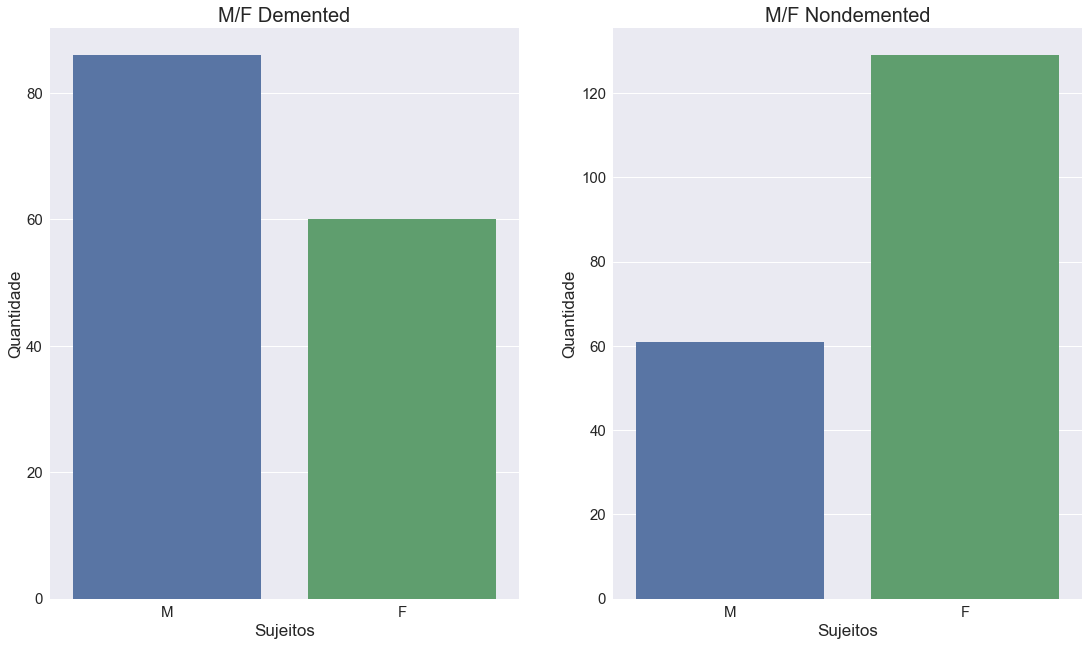

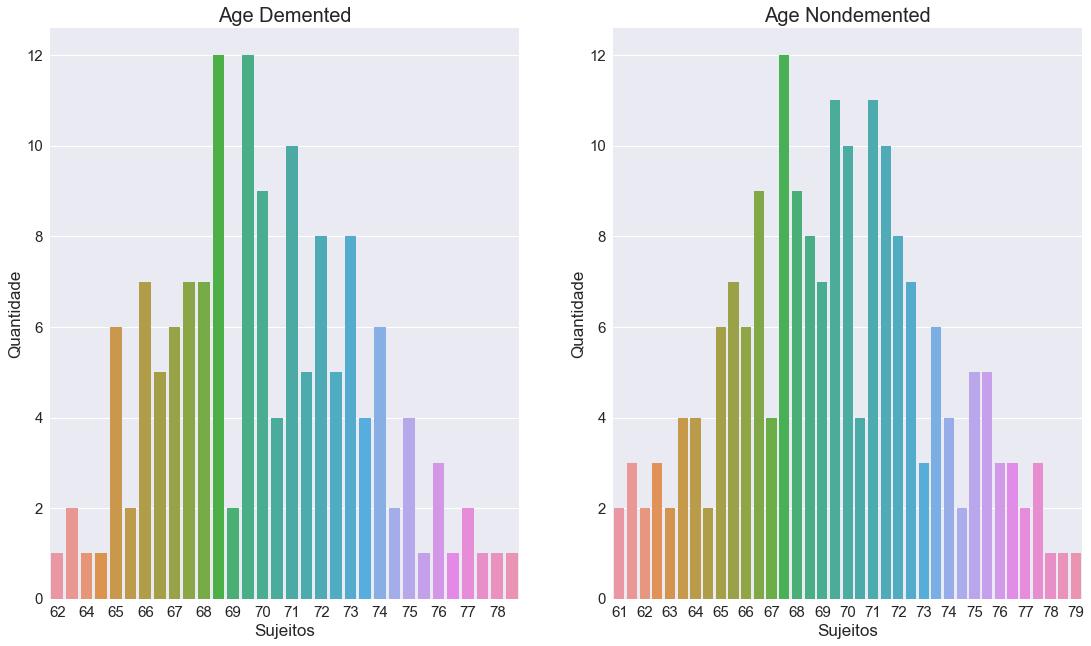

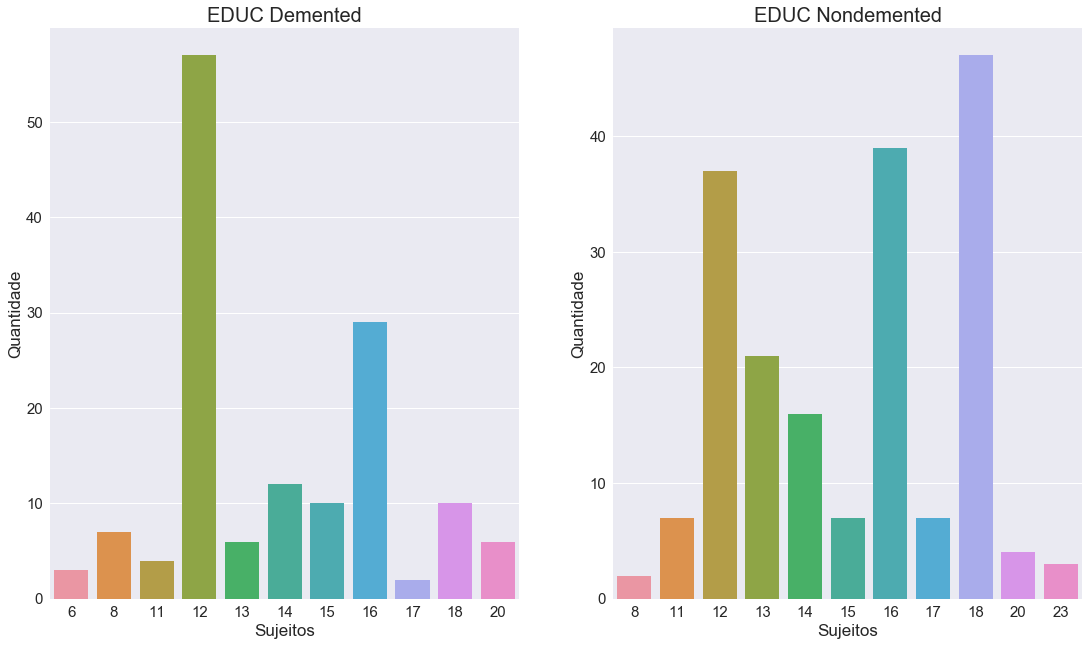

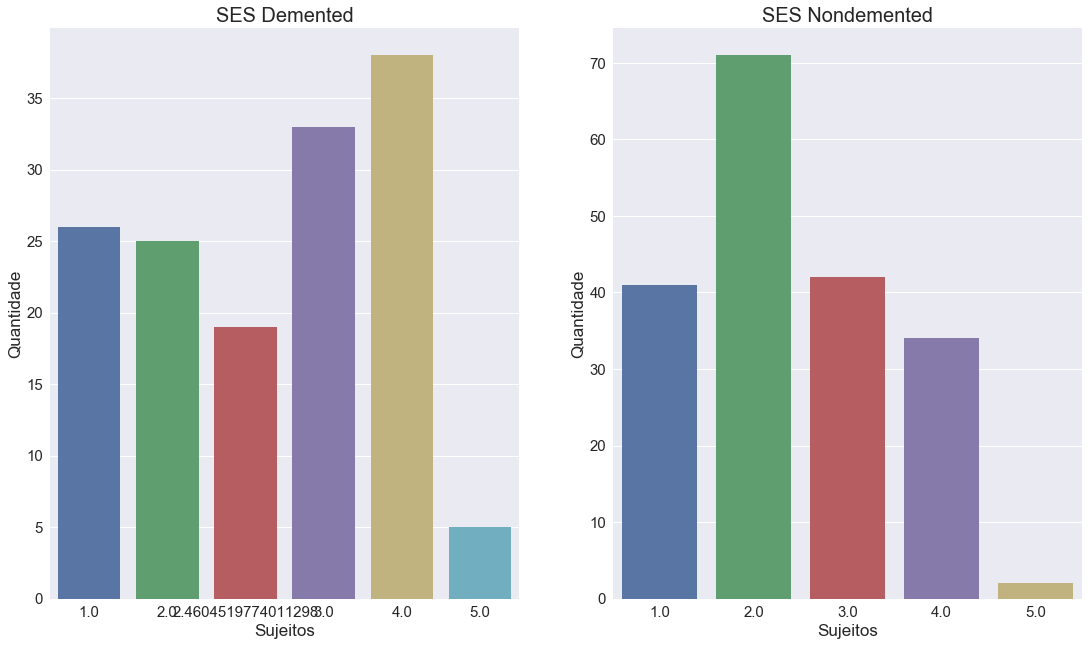

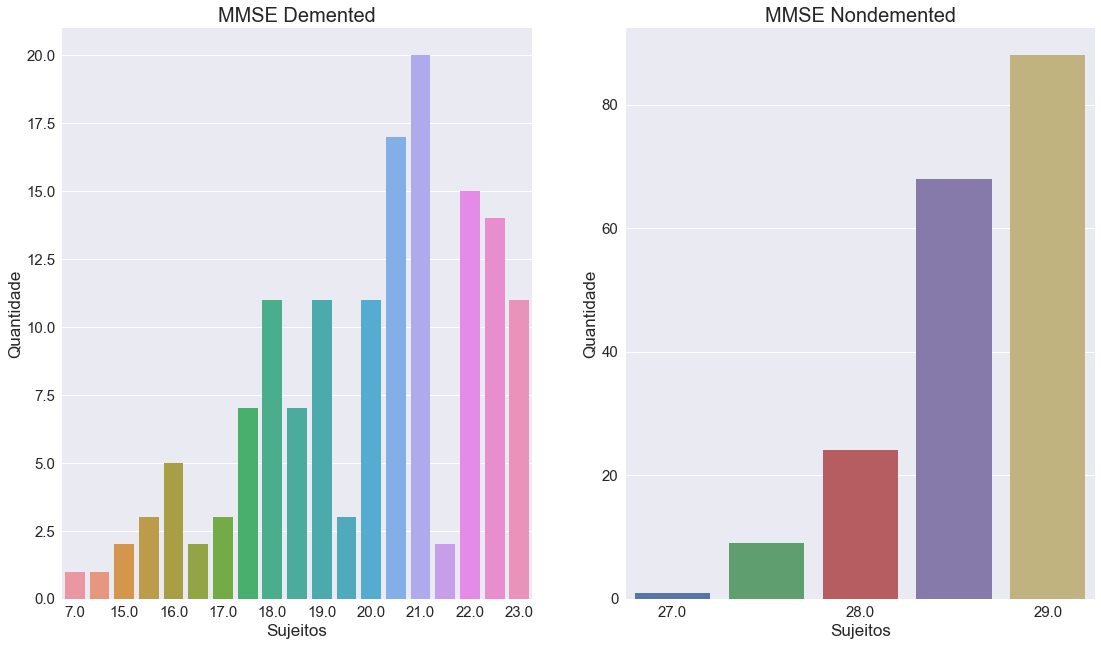

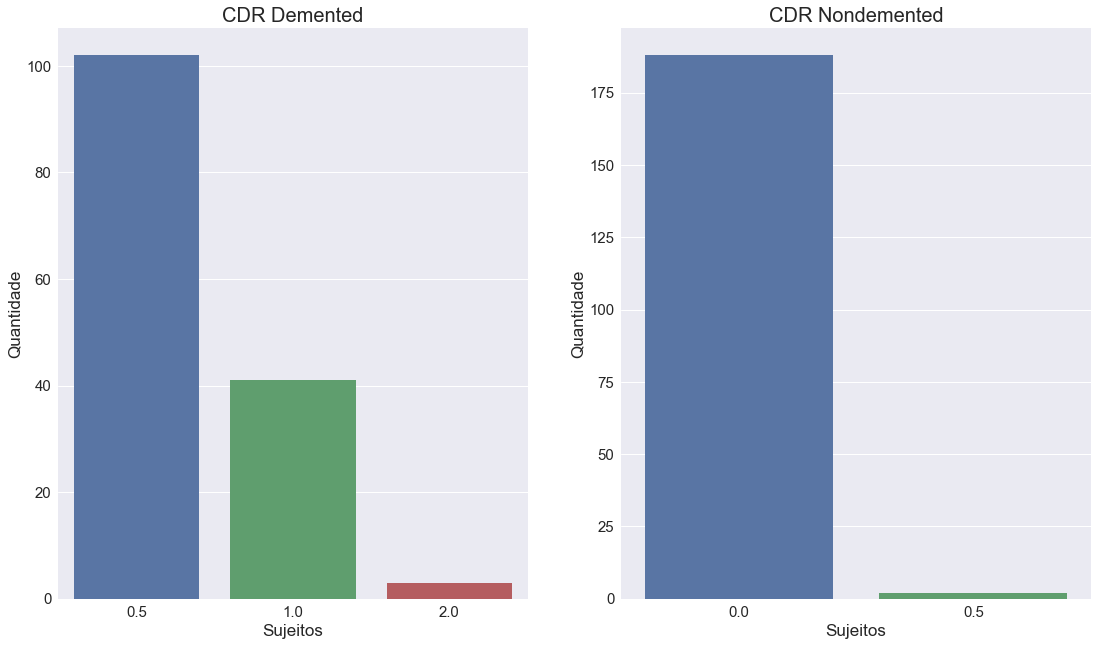

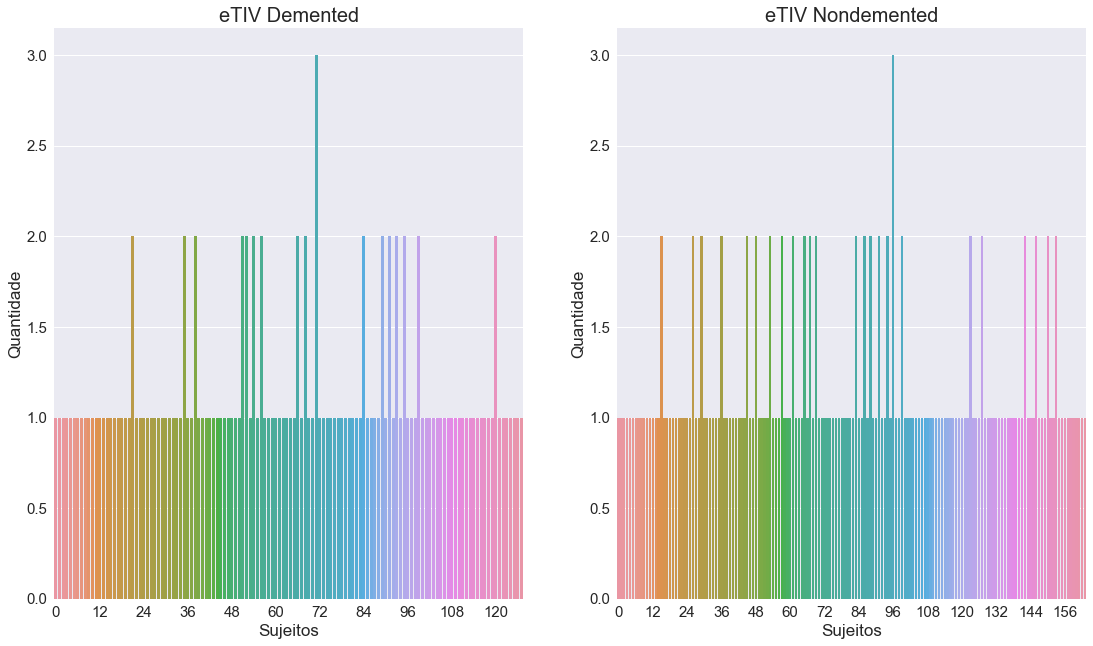

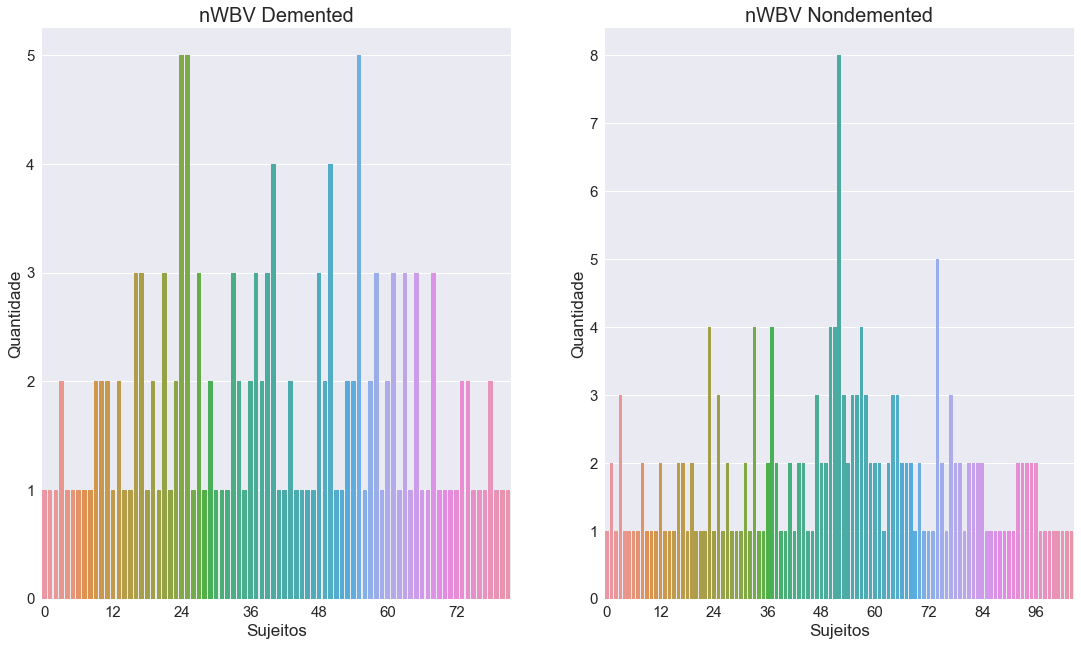

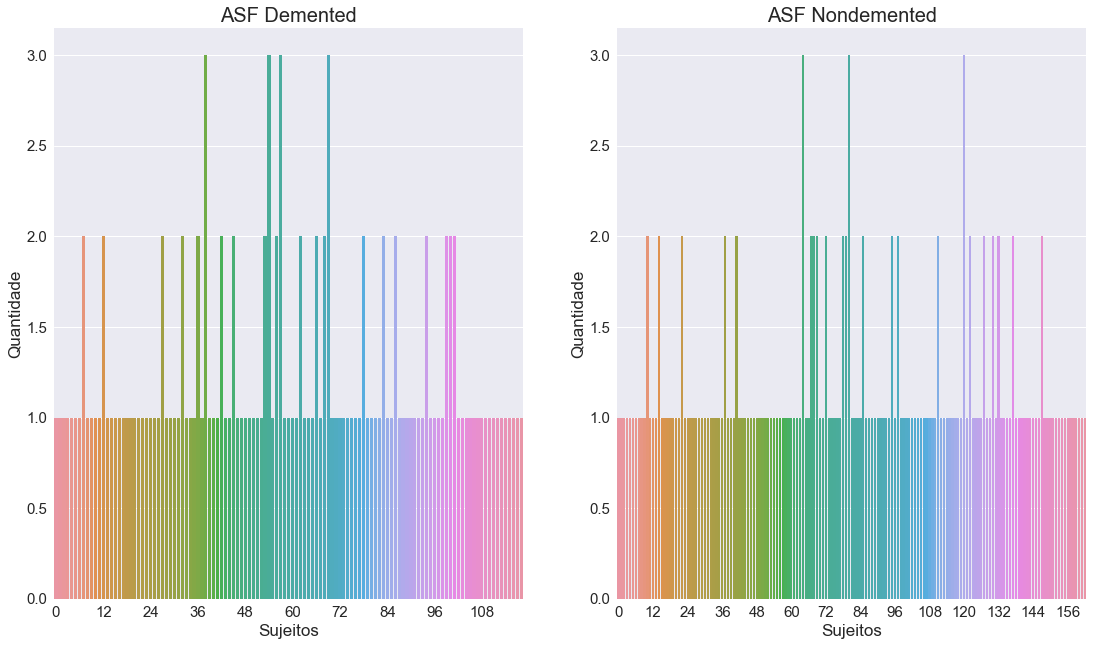

In [18]:
for item in list_atributes:
    generate_charts(item)

**Mapeamento de Dados Paramétricos**

Os algoritmos de aprendizado de máquina precisam receber dados que sejam inteiramente numéricos. Dados que representam uma classificação como por exemplo um tipo de carro, como sedan ou hatchback, deve ser convertido em um valor numérico associado, como por exemplo 1 ou 2.

In [19]:
group_map = {"Demented": 1, "Nondemented": 0}
gender_map = {"M": 1, "F": 0}
hand_map = {"R": 1, "L": 0}

df_data["Group"] = df_data["Group"].replace(['Converted'], ['Demented'])

df_data["Group"] = df_data["Group"].map(group_map)
df_data["M/F"] = df_data["M/F"].map(gender_map)
df_data["Hand"] = df_data["Hand"].map(hand_map)

Remoção do atributo **"Hand"** por não haver variação e o atributo **"MR Delay"** por não haver nenhuma causa associada, pois tal atributo indica contraste do exame de ressonânica magnética.

In [20]:
#dropar coluna "Hand" e "MR Delay" ???

In [21]:
df_data

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,1,87,14,2.000000,27.000000,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,1,88,14,2.000000,30.000000,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,1,75,12,2.460452,23.000000,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,1,76,12,2.460452,28.000000,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,1,80,12,2.460452,22.000000,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,0,1,0,0,1,88,18,3.000000,28.000000,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,0,2,538,0,1,90,18,3.000000,27.000000,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,0,1,0,1,1,80,12,4.000000,28.000000,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,0,2,1010,1,1,83,12,4.000000,29.000000,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,0,3,1603,1,1,85,12,4.000000,30.000000,0.0,1699,0.705,1.033


## 3. Pesquisar Outliers e Correlação

Utilize visualizações gráficas para encontrar outliers em todos os atributos deste dataset.
Ainda não vamos remover ou atualizar os valores, por enquanto é uma ***análise exploratória***.

Lembre-se que cada atributo possui um valor e dimensão diferente, portanto comparações devem estar em uma mesma base, por exemplo, __price__ não pode ser comparado com __width__ pois os eixos __y__ estarão sem proporção.

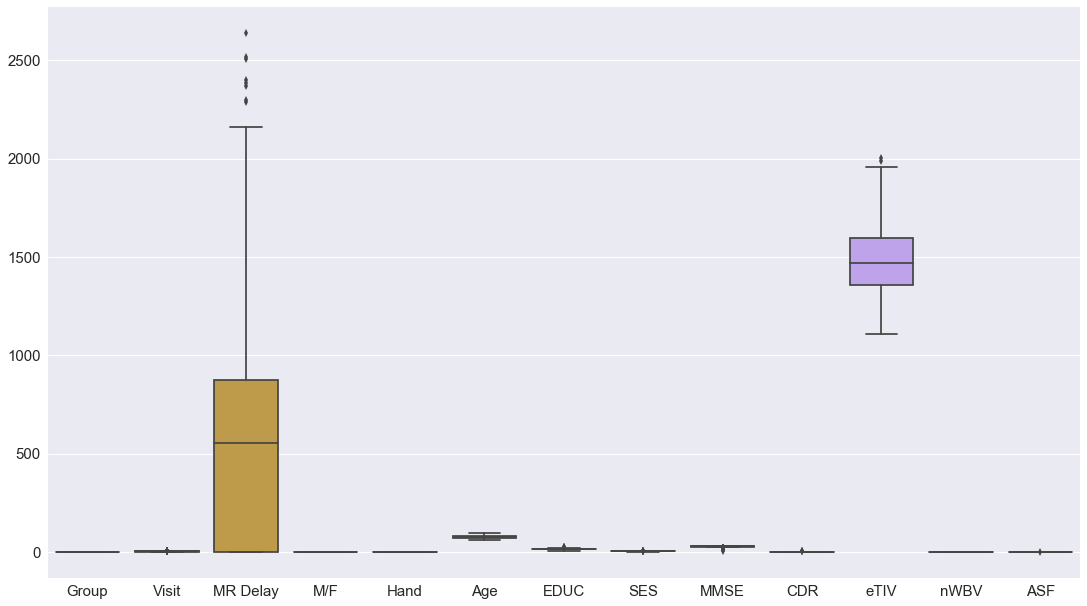

In [22]:
g = sns.boxplot(data=df_data)
g.figure.set_size_inches(18.5, 10.5)

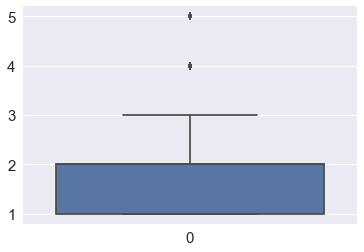

In [23]:
sns.boxplot(data=df_data["Visit"])

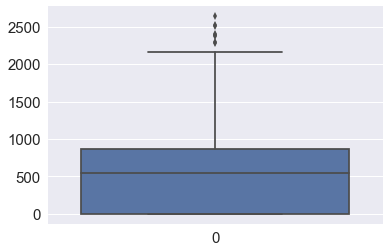

In [24]:
sns.boxplot(data=df_data["MR Delay"])

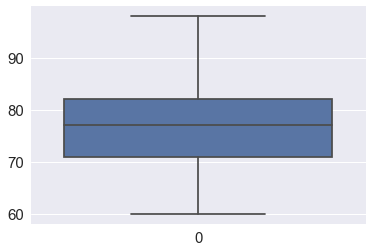

In [25]:
sns.boxplot(data=df_data["Age"])

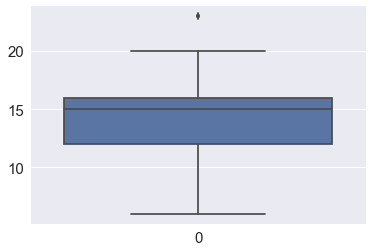

In [26]:
sns.boxplot(data=df_data["EDUC"])

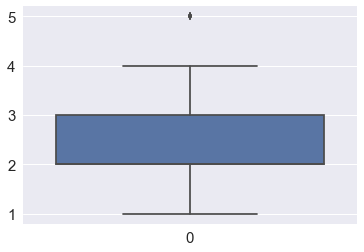

In [27]:
sns.boxplot(data=df_data["SES"])

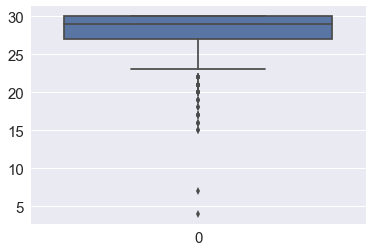

In [28]:
sns.boxplot(data=df_data["MMSE"])

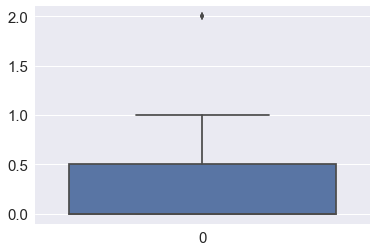

In [29]:
sns.boxplot(data=df_data["CDR"])

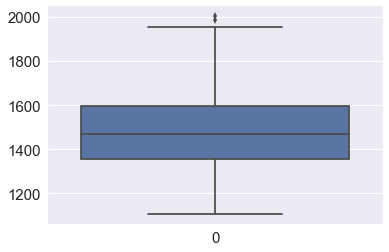

In [30]:
sns.boxplot(data=df_data["eTIV"])

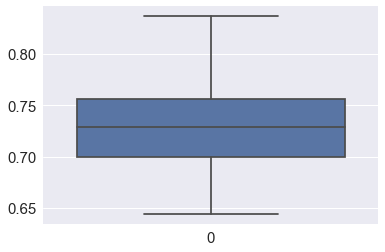

In [31]:
sns.boxplot(data=df_data["nWBV"])

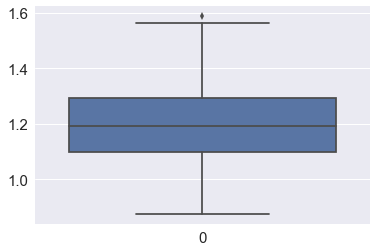

In [32]:
sns.boxplot(data=df_data["ASF"])

**Normalizar os dados**

In [33]:
#Função para normalizar os valores deixando na mesma faixa e podendo identificar com mais facilidade os outliers
def df_norm_valores(df, colunas):
    df_norm = df.copy()

    for coluna in colunas:
        df_norm[coluna] = df[coluna].div(df_norm[coluna].sum(), axis=0)
            
    return df_norm

In [34]:
features = ["Visit", "MR Delay", "M/F", "Age", "EDUC", "SES", "MMSE", "CDR", "eTIV", "nWBV", "ASF"]

df_data_norm = df_norm_valores(df_data, features)
df_data_norm.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,0.001425,0.000000,0.00625,1,0.003029,0.002571,0.002179,0.002647,0.000000,0.003580,0.002558,0.001980
1,OAS2_0001,OAS2_0001_MR2,0,0.002849,0.002059,0.00625,1,0.003063,0.002571,0.002179,0.002942,0.000000,0.003610,0.002502,0.001965
2,OAS2_0002,OAS2_0002_MR1,1,0.001425,0.000000,0.00625,1,0.002611,0.002204,0.002681,0.002255,0.004608,0.003023,0.002705,0.002346
3,OAS2_0002,OAS2_0002_MR2,1,0.002849,0.002523,0.00625,1,0.002646,0.002204,0.002681,0.002745,0.004608,0.003131,0.002620,0.002265
4,OAS2_0002,OAS2_0002_MR3,1,0.004274,0.008537,0.00625,1,0.002785,0.002204,0.002681,0.002157,0.004608,0.003059,0.002576,0.002319
5,OAS2_0004,OAS2_0004_MR1,0,0.001425,0.000000,0.00000,1,0.003063,0.003306,0.003269,0.002745,0.000000,0.002189,0.002609,0.003238
6,OAS2_0004,OAS2_0004_MR2,0,0.002849,0.002424,0.00000,1,0.003133,0.003306,0.003269,0.002647,0.000000,0.002162,0.002638,0.003279
7,OAS2_0005,OAS2_0005_MR1,0,0.001425,0.000000,0.00625,1,0.002785,0.002204,0.004358,0.002745,0.000000,0.003043,0.002616,0.002330
8,OAS2_0005,OAS2_0005_MR2,0,0.002849,0.004550,0.00625,1,0.002889,0.002204,0.004358,0.002844,0.004608,0.003064,0.002613,0.002314
9,OAS2_0005,OAS2_0005_MR3,0,0.004274,0.007222,0.00625,1,0.002959,0.002204,0.004358,0.002942,0.000000,0.003061,0.002591,0.002317


In [35]:
df_data_norm = df_data.copy()

df_data_norm["Visit"] = df_data["Visit"].div(df_data_norm["Visit"].sum(), axis=0)
df_data_norm["MR Delay"] = df_data["MR Delay"].div(df_data_norm["MR Delay"].sum(), axis=0)
df_data_norm["M/F"] = df_data["M/F"].div(df_data_norm["M/F"].sum(), axis=0)
df_data_norm["Age"] = df_data["Age"].div(df_data_norm["Age"].sum(), axis=0)
df_data_norm["EDUC"] = df_data["EDUC"].div(df_data_norm["EDUC"].sum(), axis=0)
df_data_norm["SES"] = df_data["SES"].div(df_data_norm["SES"].sum(), axis=0)
df_data_norm["MMSE"] = df_data["MMSE"].div(df_data_norm["MMSE"].sum(), axis=0)
df_data_norm["CDR"] = df_data["CDR"].div(df_data_norm["CDR"].sum(), axis=0)
df_data_norm["eTIV"] = df_data["eTIV"].div(df_data_norm["eTIV"].sum(), axis=0)
df_data_norm["nWBV"] = df_data["nWBV"].div(df_data_norm["nWBV"].sum(), axis=0)
df_data_norm["ASF"] = df_data["ASF"].div(df_data_norm["ASF"].sum(), axis=0)

df_data_norm.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,0.001425,0.000000,0.00625,1,0.003029,0.002571,0.002179,0.002647,0.000000,0.003580,0.002558,0.001980
1,OAS2_0001,OAS2_0001_MR2,0,0.002849,0.002059,0.00625,1,0.003063,0.002571,0.002179,0.002942,0.000000,0.003610,0.002502,0.001965
2,OAS2_0002,OAS2_0002_MR1,1,0.001425,0.000000,0.00625,1,0.002611,0.002204,0.002681,0.002255,0.004608,0.003023,0.002705,0.002346
3,OAS2_0002,OAS2_0002_MR2,1,0.002849,0.002523,0.00625,1,0.002646,0.002204,0.002681,0.002745,0.004608,0.003131,0.002620,0.002265
4,OAS2_0002,OAS2_0002_MR3,1,0.004274,0.008537,0.00625,1,0.002785,0.002204,0.002681,0.002157,0.004608,0.003059,0.002576,0.002319
5,OAS2_0004,OAS2_0004_MR1,0,0.001425,0.000000,0.00000,1,0.003063,0.003306,0.003269,0.002745,0.000000,0.002189,0.002609,0.003238
6,OAS2_0004,OAS2_0004_MR2,0,0.002849,0.002424,0.00000,1,0.003133,0.003306,0.003269,0.002647,0.000000,0.002162,0.002638,0.003279
7,OAS2_0005,OAS2_0005_MR1,0,0.001425,0.000000,0.00625,1,0.002785,0.002204,0.004358,0.002745,0.000000,0.003043,0.002616,0.002330
8,OAS2_0005,OAS2_0005_MR2,0,0.002849,0.004550,0.00625,1,0.002889,0.002204,0.004358,0.002844,0.004608,0.003064,0.002613,0.002314
9,OAS2_0005,OAS2_0005_MR3,0,0.004274,0.007222,0.00625,1,0.002959,0.002204,0.004358,0.002942,0.000000,0.003061,0.002591,0.002317


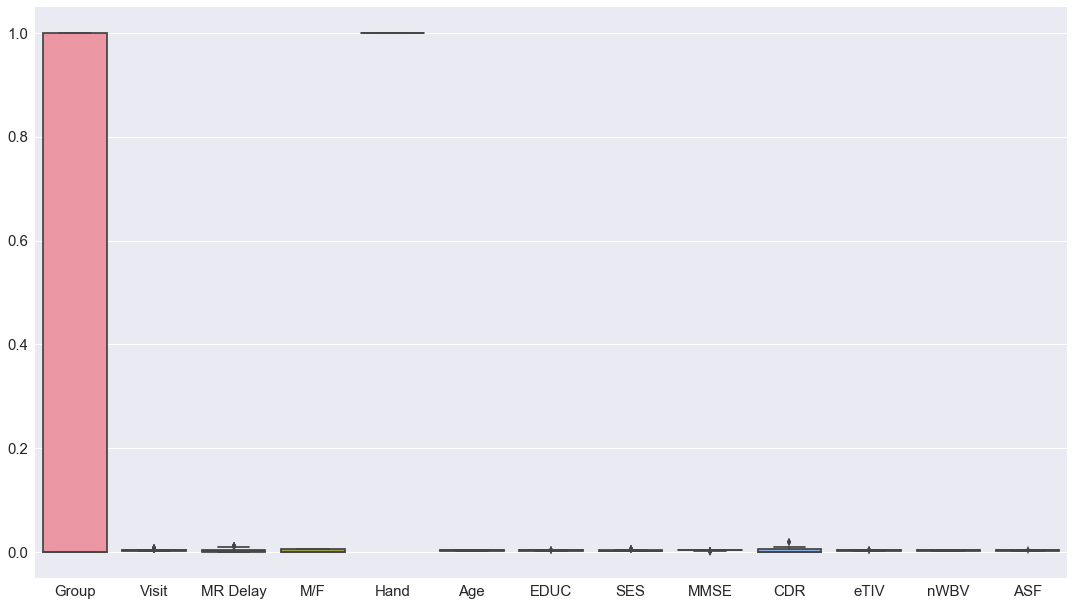

In [36]:
#Verificar Outliers com o dados normalizados
g = sns.boxplot(data=df_data_norm)
g.figure.set_size_inches(18.5, 10.5)

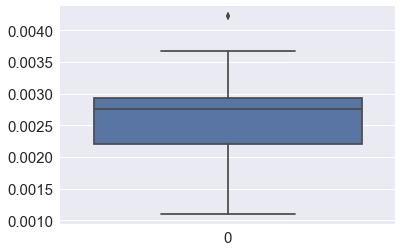

In [37]:
sns.boxplot(data=df_data_norm["EDUC"])

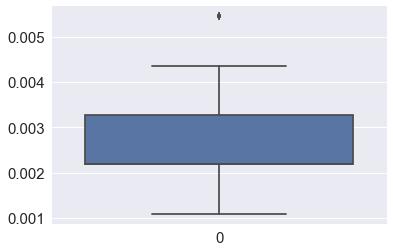

In [38]:
sns.boxplot(data=df_data_norm["SES"])

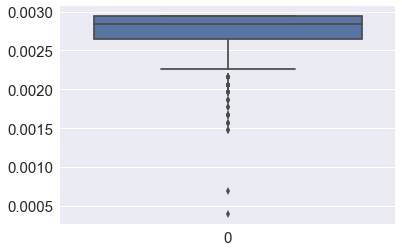

In [39]:
sns.boxplot(data=df_data_norm["MMSE"])

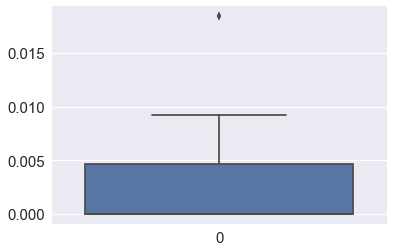

In [40]:
sns.boxplot(data=df_data_norm["CDR"])

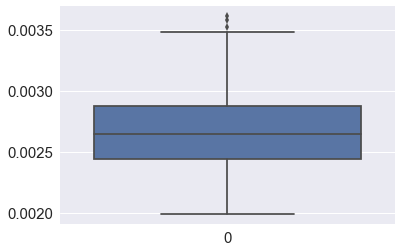

In [41]:
sns.boxplot(data=df_data_norm["eTIV"])

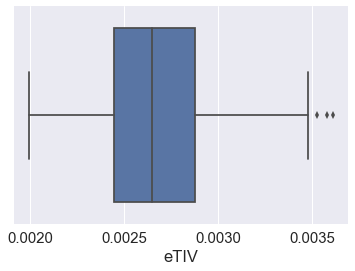

In [42]:
sns.boxplot(df_data_norm["eTIV"])

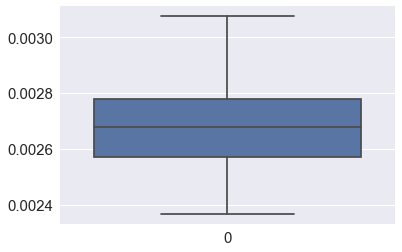

In [43]:
sns.boxplot(data=df_data_norm["nWBV"])

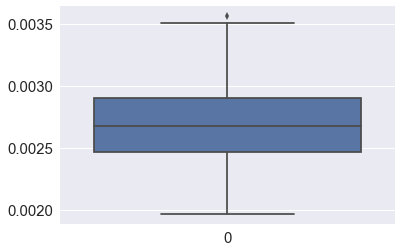

In [44]:
sns.boxplot(data=df_data_norm["ASF"])

In [45]:
df_data_norm.corr()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,-0.095507,-0.120638,0.222146,NaN,-0.005941,-0.193060,0.060697,-0.523305,0.778049,-0.042700,-0.311346,0.032495
Visit,-0.095507,1.000000,0.920009,0.069791,NaN,0.183213,0.024615,-0.050422,-0.029020,0.002325,0.117428,-0.126682,-0.120399
MR Delay,-0.120638,0.920009,1.000000,0.048006,NaN,0.205357,0.051630,-0.030258,0.065786,-0.062915,0.119624,-0.105586,-0.123545
M/F,0.222146,0.069791,0.048006,1.000000,NaN,-0.037726,0.089279,-0.044525,-0.166521,0.202140,0.572549,-0.249618,-0.561647
Hand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,-0.005941,0.183213,0.205357,-0.037726,NaN,1.000000,-0.027886,-0.046665,0.055607,-0.026257,0.042348,-0.518359,-0.035067
EDUC,-0.193060,0.024615,0.051630,0.089279,NaN,-0.027886,1.000000,-0.708680,0.194454,-0.153121,0.257015,-0.012200,-0.241752
SES,0.060697,-0.050422,-0.030258,-0.044525,NaN,-0.046665,-0.708680,1.000000,-0.146913,0.073393,-0.254271,0.089436,0.246673
MMSE,-0.523305,-0.029020,0.065786,-0.166521,NaN,0.055607,0.194454,-0.146913,1.000000,-0.679837,-0.031789,0.341857,0.039494
CDR,0.778049,0.002325,-0.062915,0.202140,NaN,-0.026257,-0.153121,0.073393,-0.679837,1.000000,0.022819,-0.344819,-0.029340


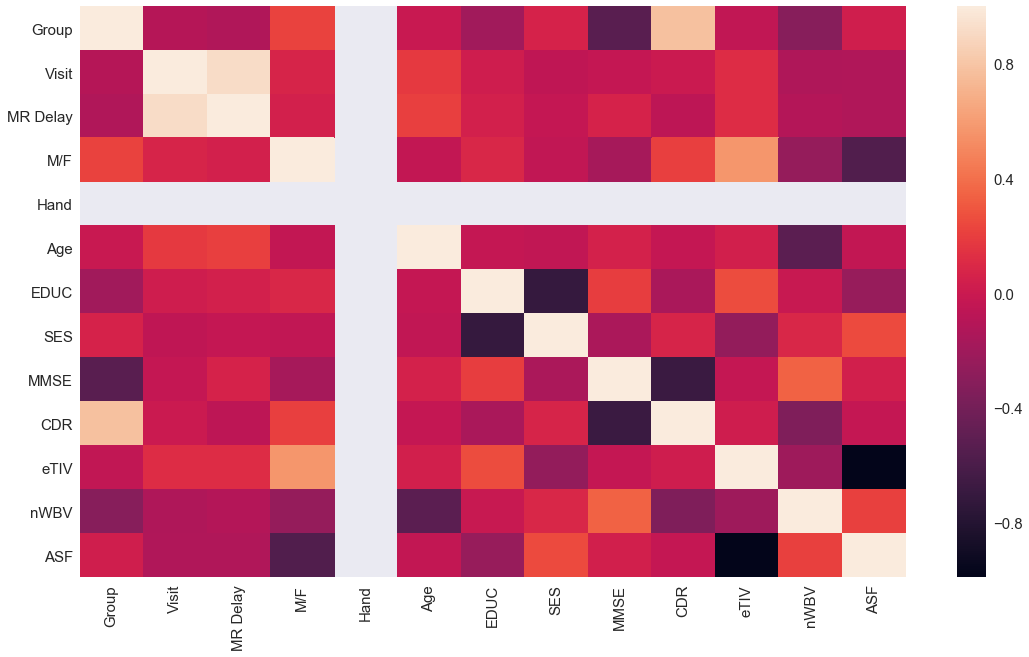

In [46]:
g = sns.heatmap(df_data.corr())
g.figure.set_size_inches(18.5, 10.5)

In [47]:
#copiar para um novo Dataset
df_data_maped = df_data.copy()

In [48]:
df_data_maped

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,1,87,14,2.000000,27.000000,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,1,88,14,2.000000,30.000000,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,1,75,12,2.460452,23.000000,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,1,76,12,2.460452,28.000000,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,1,80,12,2.460452,22.000000,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,0,1,0,0,1,88,18,3.000000,28.000000,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,0,2,538,0,1,90,18,3.000000,27.000000,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,0,1,0,1,1,80,12,4.000000,28.000000,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,0,2,1010,1,1,83,12,4.000000,29.000000,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,0,3,1603,1,1,85,12,4.000000,30.000000,0.0,1699,0.705,1.033


## 4. Desenvolvimento do Modelo

Os atributos que serão utilizados para construir o ***modelo de classificação*** serão:

+ M/F
+ Age
+ EDUC
+ SES
+ MMSE
+ CDR
+ eTIV
+ nWBC
+ ASF

O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a classificação, ou seja, queremos classificar demência dada certas condições.

Irei explorar 4 modelos de algoritmos de classificação para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:

1. [Regressão Logistica](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
2. [Calssificação de Árvore de Decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Classificação Random Forest](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)
4. [SVM](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

Antes de partimos para o treinamento do modelo, precisaremos separar os dados em subconjuntos para permitir avaliar adequadamente o modelo.

Uma boa razão de tamanho de conjunto de treinamento e testes é 80% e 20% ou ainda, 70% e 30%. O importante é não misturar dados de treinamento com os de teste para termos uma ideia melhor sobre a performance do modelo com dados previametne não treinados.

Antes de separarmos os dados, a partir das análises realizadas anteriormente, quais seriam os atributos a serem utilizados e por qual motivo. Informe também qual seria o atributo preditor?

In [49]:
#features
feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "CDR", "eTIV", "nWBV", "ASF"]
#variável Alvo
predicted_class_name = ["Group"]

## 4.1. Separação dos dados de treino e teste

Separação dos grupos de treinamento e teste, sendo a razão de 30% para testes e 70% para treinamento.

In [50]:
from sklearn.model_selection import train_test_split

X = df_data_maped[feature_col_names].values
Y = df_data_maped[predicted_class_name].values

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split_test_size, random_state=42)

In [51]:
len_x = len(X)
len_x_train = len(X_train)
len_x_test = len(X_test)

valor_x_train = (len_x_train)
valor_x_test = (len_x_test)

print("total: ", str(len_x))
print("treino: ", str(valor_x_train))
print("teste: ", str(valor_x_test))

print("{0:0.2f}% para treinamento".format((len(X_train)/len(df_data_maped)) *100))
print("{0:0.2f}% para teste".format((len(X_test)/len(df_data_maped)) *100))

total:  373
treino:  261
teste:  112
69.97% para treinamento
30.03% para teste


**Distribuição dos dados**

In [52]:
print("Original Demented: {0} ({1:0.2f}%)".format(len(df_data_maped[df_data_maped["Group"] == 1]), 100* (len(df_data_maped[df_data_maped["Group"]==1])/len(df_data_maped))))
print("Original Nondemented: {0} ({1:0.2f}%)".format(len(df_data_maped[df_data_maped["Group"] == 0]), 100* (len(df_data_maped[df_data_maped["Group"]==0])/len(df_data_maped))))
print("")
print("Trainning Demented: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), 100* (len(y_train[y_train[:] ==1])/len(y_train))))
print("Trainning Nondemented: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), 100* (len(y_train[y_train[:] ==0])/len(y_train))))
print("")
print("Test Demented: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), 100* (len(y_test[y_test[:] ==1])/len(y_test))))
print("Test Nondemented: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), 100* (len(y_test[y_test[:] ==0])/len(y_test))))

Original Demented: 183 (49.06%)
Original Nondemented: 190 (50.94%)

Trainning Demented: 123 (47.13%)
Trainning Nondemented: 138 (52.87%)

Test Demented: 60 (53.57%)
Test Nondemented: 52 (46.43%)


#### Matriz de Confusão

Função para exibição de Confusion Matrix

In [53]:
from sklearn import metrics

def report_performance(model):
    print(metrics.confusion_matrix(y_test, model))
    print(metrics.classification_report(y_test, model))

### Classificação com Regressão Logística

A função ```.ravel()``` para converter os dados no formato que o ```sklearn``` espera.

In [54]:
from sklearn import linear_model
lr_model = linear_model.LogisticRegression()

#Treino o Modelo
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Avaliação do Modelo

In [55]:
#métrica "Accuracia do modelo"
lr_model.score(X_test, y_test)

0.9196428571428571

In [56]:
#predição do modelo
lr_model_pred = lr_model.predict(X_test)
lr_model_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1], dtype=int64)

In [57]:
lr_model.score(X_train, y_train)

0.9578544061302682

In [58]:
report_performance(lr_model_pred)

[[51  1]
 [ 8 52]]
             precision    recall  f1-score   support

          0       0.86      0.98      0.92        52
          1       0.98      0.87      0.92        60

avg / total       0.93      0.92      0.92       112



Matriz de confusão:

| --               | Previsão Positiva             | Previsão Negativa   |
| :--------------------------------------- | :------------- | :-----: |
| Caso Positivo    | Verdadeiro Positivo (VP)      | `Falso Negativo (FN)`        |
| Caso Negativo    | Falso Positivo (FP)           | `Verdadeiro Negativo (VN)`   |

Onde VP, FN, FP e VN são assim definidas: 
+ VP corresponde ao número de objetos da classe positiva classificados corretamente; 
+ FN corresponde ao número de objetos pertencentes à classe positiva que foram incorretamente atribuídos à classe negativa; 
+ FP corresponde ao número de objetos cuja classe verdadeira é negativa mas que foram classificados incorretamente como pertencentes à classe positiva; 
+ VN corresponde ao número de objetos da classe negativa classificados corretamente.

Assim, as medidas de desempenho são: 
+ sensibilidade: S = V P (V P + F N) 
mede a acurácia nos casos fraudulentos;

+ precisão: P = V P (V P + F P)
mede a acurácia nos casos apontados como fraudulentos.

### Classificação com Árvore de Decisão

In [59]:
from sklearn import tree
dtc_model = tree.DecisionTreeClassifier()

dtc_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Avaliação do Modelo

In [60]:
dtc_model.score(X_test, y_test)

0.875

In [61]:
dtc_model_pred = dtc_model.predict(X_test)

In [62]:
report_performance(dtc_model_pred)

[[46  6]
 [ 8 52]]
             precision    recall  f1-score   support

          0       0.85      0.88      0.87        52
          1       0.90      0.87      0.88        60

avg / total       0.88      0.88      0.88       112



In [63]:
#roc_auc_score(y_test, dtc_model_pred)

### Classificação com Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=2, random_state=42)

rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### Avaliação do Modelo

In [65]:
rf_model.score(X_test, y_test)

0.9196428571428571

In [66]:
rf_model_pred = rf_model.predict(X_test)

In [67]:
report_performance(rf_model_pred)

[[51  1]
 [ 8 52]]
             precision    recall  f1-score   support

          0       0.86      0.98      0.92        52
          1       0.98      0.87      0.92        60

avg / total       0.93      0.92      0.92       112



### Classificação com SVM

In [68]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear')

svm_model.fit(X_train, y_train.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Avaliação do Modelo

In [69]:
svm_model.score(X_test, y_test)

0.9107142857142857

In [70]:
svm_model_pred = svm_model.predict(X_test)

In [71]:
report_performance(svm_model_pred)

[[50  2]
 [ 8 52]]
             precision    recall  f1-score   support

          0       0.86      0.96      0.91        52
          1       0.96      0.87      0.91        60

avg / total       0.92      0.91      0.91       112



### Descobrir a importância dos Atributos

Importâncias de característica com florestas de árvores
Este exemplo mostra o uso de florestas de árvores para avaliar a importância de recursos em uma tarefa de classificação artificial. As barras verdes são as principais características da floresta, juntamente com a variabilidade entre árvores.
Como esperado, o enredo sugere que 3 características são informativas, enquanto as restantes não são.
e foram posteriormente caracterizados como dementes em uma visita posterior.

Feature ranking:

1 feature 2 M/F (34.923217)
2 feature 1 Age (23.519945)
3 feature 3 EDUC (17.717134)
4 feature 4 SES (13.739874)
5 feature 5 MMSE (2.167355)
6 feature 6 CDR (2.090092)
7 feature 0 eTIV (2.085842)
8 feature 8 nWBV (1.895092)
9 feature 7 ASF (1.861447)


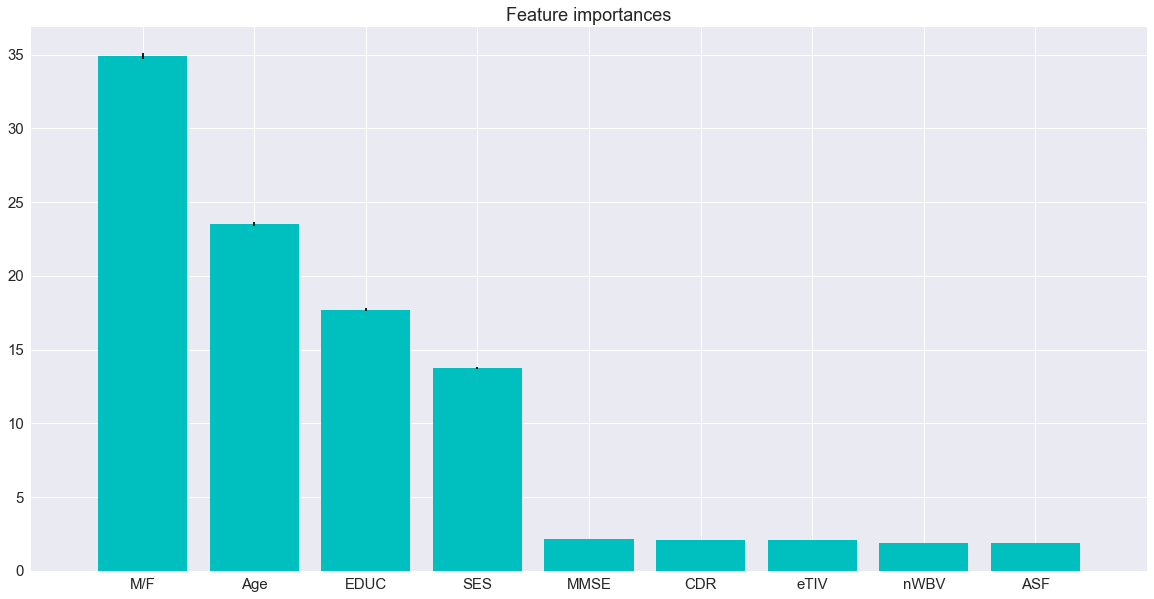

In [72]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

model_extraTreeClass = ExtraTreesClassifier()

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=len(feature_col_names))

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)
#forest.fit(X_train, y_train)

importances = forest.feature_importances_*100
#print("importances: ", importances)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
#print("std: ", std)
indices = np.argsort(importances)[::-1]

# ranking das features
print("Feature ranking:\n")

for t in range(X.shape[1]):
    print("%d feature %d %s (%f)" % (t + 1, indices[t], feature_col_names[t], importances[indices[t]]))
    
col_name = lambda x : feature_col_names[x]
    
#plotar a importância dos atributos
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="c", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), list(map(col_name,range(X.shape[1]))))
plt.xlim([-1, X.shape[1]])
plt.show()

**Link de referência:** http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

## 5. Validação e Otimização do Modelo

Cada algoritmo do modelo pode oferecer a possibilidade de ajustes de seus parâmetros. Tais ajustes podem contribuir para melhorar ou piorar o modelo, portanto esta fase de otimização e validação é importante entender o patamar de partida, com os valores padrões obtidos nos passos anteriores versus as otimizações.

É comum que as otimizações não sejam capazes de alterar os patamares padrão.

O Scikit Learn oferece uma forma simplificada de testar diversas condições de parâmetros diferentes por meio do **```GridSearchCV```**. Após diversos testes é apresentado os parâmetros que obtiveram os melhores resultados.

### Regulação dos parâmetros dos modelos

Analise os parâmetros possíveis de cada algortimo de regressão e crie um dicionário para ser utilizado no ```GridSearchCV```.
O dicionário é composto pelo nome do parâmetro como chave. Seu valor será uma lista de valores que se deseja otimizar. Não deixe de revisar a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Verfique a pontuação R2 para os conjuntos de dados de treino e de teste, pois nem sempre preditores que se saem bem durante o treinamento terão a mesma performance com os dados de teste.

### Otimização

Escolha quais atributos incluir na variável **```parameters```** para serem otimizados. Essa variável é um dicionário onde cada chave representa uma configuração do modelo, o valor pode ser único ou uma lista, neste caso utilize **```[]```** para incluir múltiplos valores. Como nosso problema é relacionado a regressão, utilize a pontuação R2 em **```scoring```** na configuração do **```GridSearchCV```**. 

O **```GridSearchCV```*** implementa um método de “ajuste” e “pontuação”.

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
def report_score(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

### Regularização do Modelo de Regressão Logistica

In [75]:
param_grid = {}

clf = linear_model.LogisticRegression()

opt_lr_model = GridSearchCV(clf, param_grid=param_grid, cv=10)
opt_lr_model.fit(X_train, y_train.ravel())
report_score(opt_lr_model.cv_results_)

Model with rank: 1
Mean validation score: 0.958 (std: 0.039)
Parameters: {}



In [76]:
opt_lr_model.score(X_test, y_test.ravel()), opt_lr_model.best_estimator_

(0.9196428571428571,
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))

### Regularização do Modelo Arvore Decisão

In [77]:
param_grid = {}
''
dt_model = tree.DecisionTreeClassifier()

opt_model_dt = GridSearchCV(dt_model, param_grid=param_grid, cv=10)
opt_model_dt.fit(X_train, y_train.ravel())
report_score(opt_model_dt.cv_results_)

Model with rank: 1
Mean validation score: 0.931 (std: 0.038)
Parameters: {}



In [78]:
opt_model_dt.score(X_test, y_test), opt_model_dt.best_estimator_

(0.8839285714285714,
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'))

### Regularização do Modelo RandomForest

In [79]:
param_grid = {}

rf_model = RandomForestClassifier(n_estimators=20)

opt_model_grid = GridSearchCV(rf_model, param_grid=param_grid, cv=10)
opt_model_grid.fit(X_train, y_train.ravel())
report_score(opt_model_grid.cv_results_)

Model with rank: 1
Mean validation score: 0.950 (std: 0.038)
Parameters: {}



In [80]:
opt_model_grid.score(X_test, y_test.ravel()), opt_model_grid.best_estimator_

(0.9285714285714286,
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False))

### Regularização do Modelo SVM

In [81]:
param_grid_svm = {}

clf_svm = svm.SVC()

grid_search = GridSearchCV(clf_svm, param_grid=param_grid_svm, cv=10, scoring="roc_auc")
grid_search.fit(X, y)
report_score(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.944 (std: 0.025)
Parameters: {}



### Resultados finais